# 🧠 XGBoost + SHAP: Explainability for Loan Default Prediction

In [2]:

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/Users/devanshudixit/Desktop/projects/BankIQ/data/processed/enhanced_customers.csv")
df = df.dropna(subset=["HighRiskLoan"])

features = [
    "LoanBurdenScore", "AvgLoanAmount", "AvgEMItoIncomeRatio",
    "CreditScore", "Income", "Age"
]
target = "HighRiskLoan"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

# Train XGBoost model
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)


/Users/devanshudixit/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [4]:

# Initialize SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


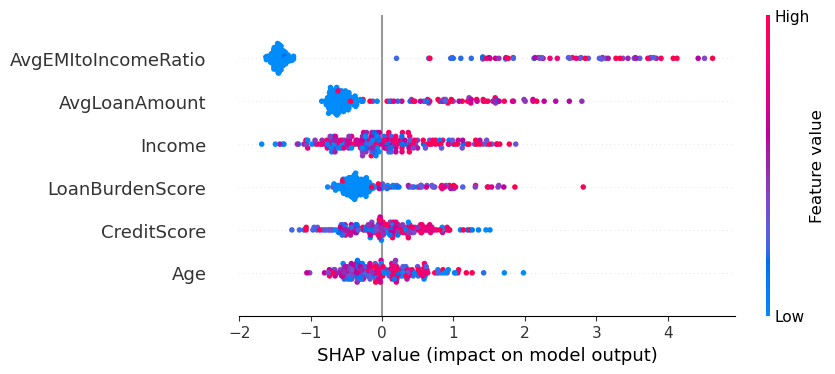

In [5]:

# Summary plot (global interpretability)
shap.plots.beeswarm(shap_values)


In [8]:
shap.initjs()

# SHAP force plot for a single example (first sample in test set)
shap.plots.force(shap_values[0])


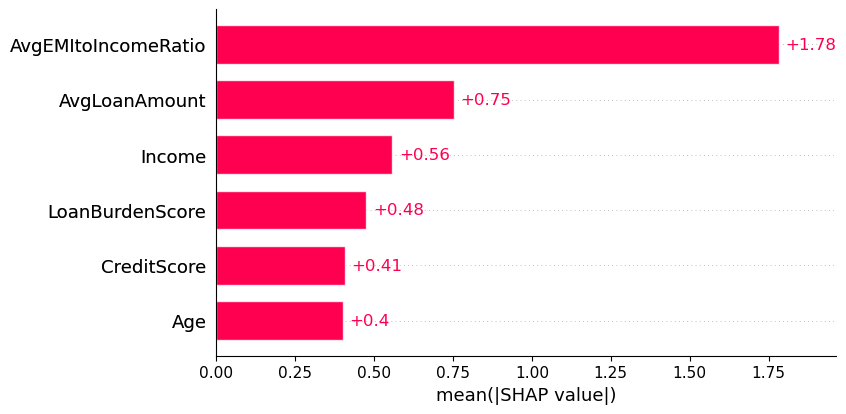

In [7]:

# SHAP feature importance bar chart
shap.plots.bar(shap_values)
